## importing data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('cubic_zirconia.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [2]:
df.drop(['Unnamed: 0'],axis = 1,inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#### there are some null values in depth but its not worth droping it until we know if depth plays a major role in
#### predicting the price of our stone

In [4]:
 df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


# analysis of catagorical data

In [5]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

<AxesSubplot:xlabel='cut', ylabel='price'>

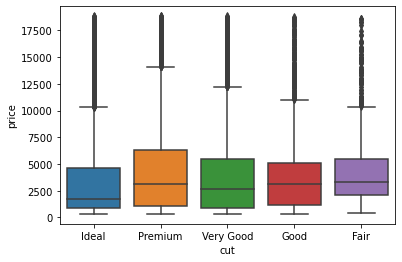

In [6]:
sns.boxplot(x="cut", y="price", data=df)

In [7]:
df['clarity'].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

<AxesSubplot:xlabel='clarity', ylabel='price'>

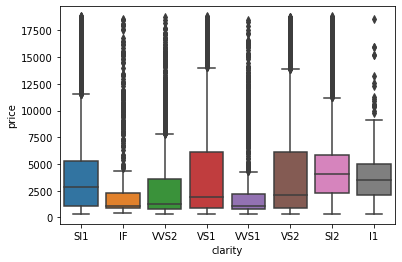

In [8]:
sns.boxplot(x="clarity", y="price", data=df)

In [9]:
df['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='price'>

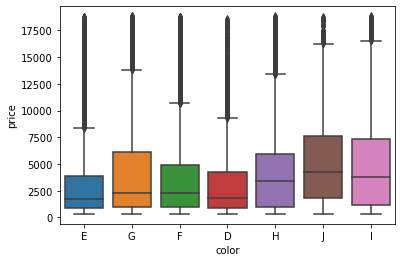

In [10]:
sns.boxplot(x="color", y="price", data=df)

### grouping different type of categorical data or multivariate analysis

In [11]:
df_gptest = df[['cut','clarity','price']]
grouped_test1 = df_gptest.groupby(['cut','clarity'],as_index=False).mean()
grouped_test1

,cut,clarity,price
0,Fair,I1,3554.483146
1,Fair,IF,1995.750000
2,Fair,SI1,4243.466321
3,Fair,SI2,5623.511111
4,Fair,VS1,4566.301075
5,Fair,VS2,4542.356589
6,Fair,VVS1,2977.300000
7,Fair,VVS2,3352.078947
8,Good,I1,3804.137255
9,Good,IF,3901.400000


In [12]:
grouped_pivot = grouped_test1.pivot(index='cut',columns='clarity')
grouped_pivot

price                                                      \
clarity             I1           IF          SI1          SI2          VS1   
cut                                                                          
Fair       3554.483146  1995.750000  4243.466321  5623.511111  4566.301075   
Good       3804.137255  3901.400000  3713.133333  4419.496226  3896.335347   
Ideal      3949.594595  2177.205546  3703.503256  4808.833082  3488.882287   
Premium    4082.685185  3552.469565  4422.235489  5527.440304  4376.546092   
Very Good  4240.232558  4365.219697  4020.547763  5086.769819  3840.144307   

                                                  
clarity            VS2         VVS1         VVS2  
cut                                               
Fair       4542.356589  2977.300000  3352.078947  
Good       4371.873727  2378.500000  2982.447552  
Ideal      3341.883703  2407.009653  3242.023718  
Premium    4509.370065  2865.684039  3894.144231  
Very Good  4284.074960  2491.544041  2955.763955

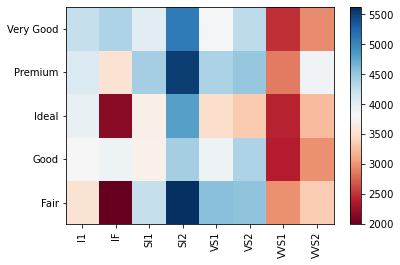

In [13]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### this tells us that clarity SI2 type has higher prize range no matter what is the cut also the cut type of premium and 
#### fair with clarity SI2 has the highest cost

In [14]:
df_gptest = df[['cut','color','price']]
grouped_test2 = df_gptest.groupby(['cut','color'],as_index=False).mean()
grouped_test2

,cut,color,price
0,Fair,D,4515.500000
1,Fair,E,4156.730000
2,Fair,F,4050.209459
3,Fair,G,4218.755102
4,Fair,H,5394.446667
5,Fair,I,4817.212766
6,Fair,J,5073.529412
7,Good,D,3508.893891
8,Good,E,3284.087576
9,Good,F,3532.801762


In [15]:
grouped_pivot = grouped_test2.pivot(index='cut',columns='color')
grouped_pivot

price                                                      \
color                D            E            F            G            H   
cut                                                                          
Fair       4515.500000  4156.730000  4050.209459  4218.755102  5394.446667   
Good       3508.893891  3284.087576  3532.801762  4243.754177  4094.258523   
Ideal      2518.020582  2618.787386  3332.029054  3757.981781  3881.161082   
Premium    3665.972772  3468.714651  4327.646101  4448.418083  5168.608958   
Very Good  3663.672507  3259.383642  3688.394564  3843.262565  4655.959414   

                                     
color                I            J  
cut                                  
Fair       4817.212766  5073.529412  
Good       5088.952569  4845.267081  
Ideal      4500.284250  4903.353201  
Premium    5862.732771  6341.402948  
Very Good  5433.170313  4988.785311

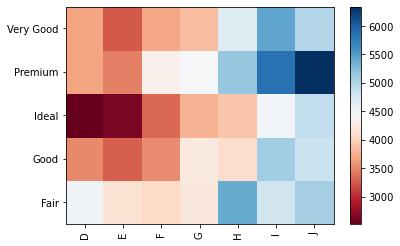

In [16]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [17]:
df_gptest = df[['color','clarity','price']]
grouped_test3 = df_gptest.groupby(['color','clarity'],as_index=False).mean()
grouped_pivot = grouped_test3.pivot(index='color',columns='clarity')
grouped_pivot

price                                                      \
clarity           I1           IF          SI1          SI2          VS1   
color                                                                      
D        3500.920000  6821.868421  3070.901923  4009.846498  3062.813008   
E        3411.018519  3203.149425  3091.525220  4248.641932  2895.830400   
F        3455.358209  3004.153005  3801.268382  4460.978752  3520.940476   
G        3345.426471  2494.192982  3675.142857  4925.540436  4170.116883   
H        4663.268293  1836.040268  4992.636784  6178.312814  3874.870588   
I        4157.312500  1975.898551  5444.255172  6911.579957  4845.812500   
J        5392.142857  3608.038462  5318.935233  6419.930233  4669.532847   

                                                
clarity          VS2         VVS1         VVS2  
color                                           
D        2584.588308  2680.462810  3225.481884  
E        2746.836938  2181.339181  2604.528487  
F        3774.345980  2829.100000  3322.282565  
G        4517.668050  2939.861933  3866.740088  
H        4655.192786  1731.107639  2881.336601  
I        5697.398010  2131.196721  2776.938144  
J        5415.676471  3549.421053  5106.060606

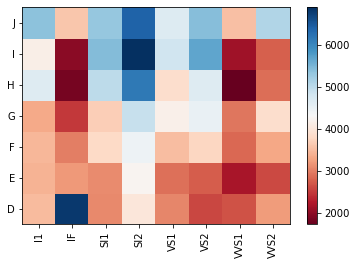

In [18]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# numericaldata analysis

In [19]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


### carat,x,y,z are more related to price than anything else

[]

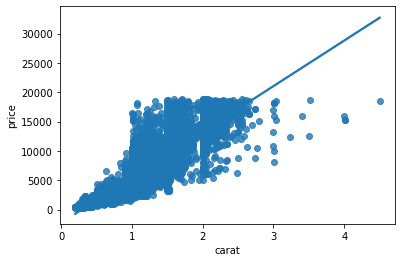

In [20]:
sns.regplot(x="carat", y="price", data=df)
plt.plot()

[]

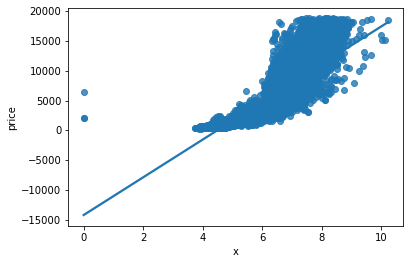

In [21]:
sns.regplot(x="x", y="price", data=df)
plt.plot()

[]

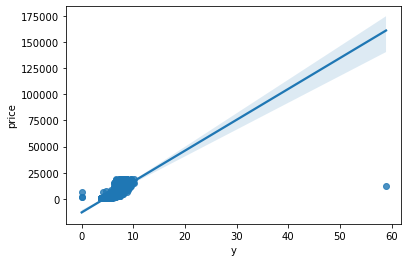

In [22]:
sns.regplot(x="y", y="price", data=df)
plt.plot()

[]

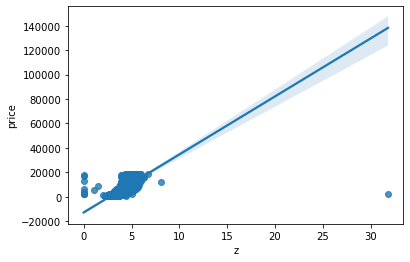

In [23]:
sns.regplot(x="z", y="price", data=df)
plt.plot()

### Multivariate analysis

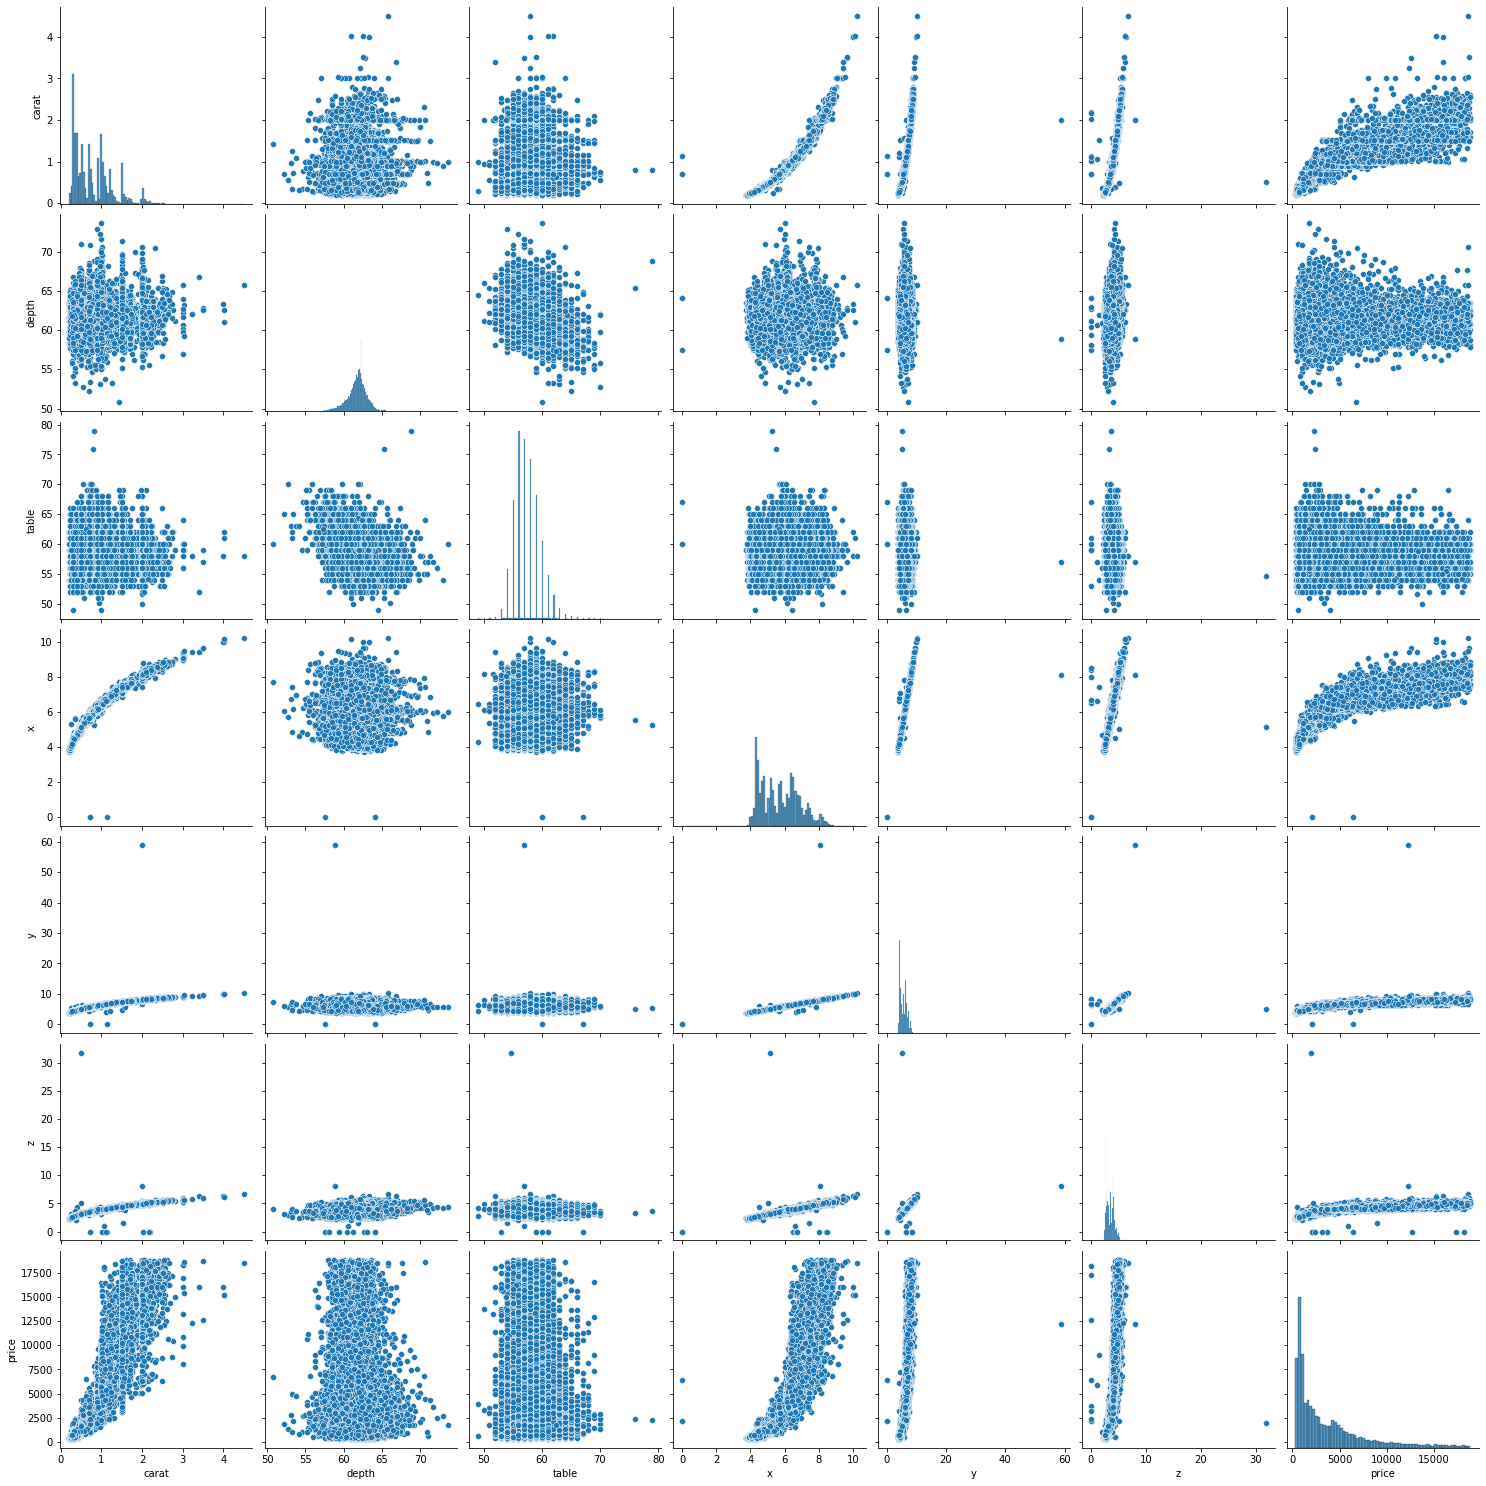

In [24]:
sns.pairplot(df,height = 3)